Maze connectivity ensured.
#.################################################
#S#.......#.............#.......#.............#.##
#.#.#####.###.#.#####.###.###.###.#.#########.#.##
#...#.....#...#.#...#.#...#...#...#.#.....#.#...##
#####.#####.###.#.#.#.#.###.#.#.###.#.###.#.###.##
#...#.....#...#.#.#.#.#.#...#.#.#.#.....#.#.#...##
###.#####.###.#.#.#.###.#.#####.#.#######.#.#.####
#...#.....#...#.#.#.#...#.......#.....#...#.....##
#.###.#####.#.###.#.#.#############.###.#######.##
#.....#.....#.#...#...#...........#...#.....#...##
#.#####.###.###.###########.#####.###.#####.######
#.#...#...#...#...........#...#.#...#.....#.#...##
#.###.###.###.###########.#.#.#.###.#.#####.#.#.##
#...#...#.#.#.......#.....#.#.#.....#.#...#...#.##
###.###.#.#.###.#.###.#######.#.#####.#.#.#####.##
#.#...#.#...#...#.#...#...#...#...#.....#.....#.##
#.###.#.###.#.#####.###.#.#.#####.#########.###.##
#.#...#...#.#.......#...#...#.............#.#...##
#.#.###.#.#.###########.#####.###########.#.#.####
#.#.

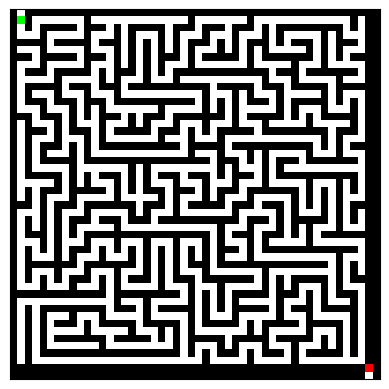

In [11]:
import random
import numpy as np
from matplotlib import pyplot as plt
from collections import deque

DISTANCE = 16  # Length of the square for visualization
Grid = None  # Maze Grid storage

def makeGrid(width: int, height: int):
    global Grid
    grid = []
    for i in range(width * DISTANCE + 2):
        sample = []
        for j in range(height * DISTANCE + 2):
            if i % DISTANCE == 0 or i % DISTANCE == 1 or j % DISTANCE == 0 or j % DISTANCE == 1:
                sample.append((0, 0, 0))  # Black border/grid
            else:
                sample.append((225, 225, 225))  # White rest as default
        grid.append(sample)
    Grid = np.array(grid, dtype='uint8')

def create_maze(width, height):
    maze = [['#' for _ in range(width)] for _ in range(height)]
    
    def carve_passages_from(x, y):
        directions = [(0, 2), (2, 0), (0, -2), (-2, 0)]
        random.shuffle(directions)
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 < nx < width - 1 and 0 < ny < height - 1 and maze[ny][nx] == '#':
                maze[y + dy // 2][x + dx // 2] = '.'  # Mark passage
                maze[ny][nx] = '.'  # Mark next cell as passage
                carve_passages_from(nx, ny)
    
    # Ensure first and last rows are walls except for entrance and exit
    for x in range(width):
        maze[0][x] = '#'
        maze[height - 1][x] = '#'
    
    maze[1][1] = 'S'  # Mark entrance
    maze[0][1] = '.'  # Ensure entrance is accessible
    carve_passages_from(1, 1)
    maze[height - 2][width - 2] = 'E'  # Mark exit
    maze[height - 1][width - 2] = '.'  # Ensure exit is accessible
    
    return maze

def is_fully_connected(maze):
    #Make sure there is no space not being reached from (1,1) sa=tart point
    width, height = len(maze[0]), len(maze)
    visited = set()
    queue = deque([(1, 1)])

    while queue:
        x, y = queue.popleft()
        if (x, y) in visited:
            continue
        visited.add((x, y))

        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and maze[ny][nx] != '#' and (nx, ny) not in visited:
                queue.append((nx, ny))

    return all(maze[y][x] != '#' or (x, y) in visited for y in range(height) for x in range(width))

#Fixes the maze by breaking walls to connect all regions. Ensure the connectivity of the whole maze
def ensure_connectivity(maze):
    if is_fully_connected(maze):
        print("Maze is already fully connected.")
        return

    width, height = len(maze[0]), len(maze)
    queue = deque([(1, 1)])  # Start from entrance
    visited = set(queue)

    while queue:
        x, y = queue.popleft()
        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                if maze[ny][nx] == '.':
                    queue.append((nx, ny))
                    visited.add((nx, ny))

    # Identify isolated regions and connect them
    for y in range(1, height - 1, 2):
        for x in range(1, width - 1, 2):
            if maze[y][x] == '.' and (x, y) not in visited:
                print(f"Fixing connectivity at ({x}, {y})")
                # Find a neighboring passage to connect to
                for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                    nx, ny = x + dx, y + dy
                    if maze[ny][nx] == '.':  # Connect to an existing path
                        maze[(y + ny) // 2][(x + nx) // 2] = '.'
                        queue.append((x, y))
                        visited.add((x, y))
                        break  # Stop after fixing one connection

    print("Maze connectivity ensured.")



def display_maze_graph(maze):
    fig, ax = plt.subplots()
    ax.set_xticks([])
    ax.set_yticks([])
    
    height = len(maze)
    width = len(maze[0])
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    for y in range(height):
        for x in range(width):
            if maze[y][x] == '#':
                image[y, x] = (0, 0, 0)  # Walls are black
            elif maze[y][x] == 'S':
                image[y, x] = (0, 255, 0)  # Entrance is green
            elif maze[y][x] == 'E':
                image[y, x] = (255, 0, 0)  # Exit is red
            else:
                image[y, x] = (255, 255, 255)  # Passages are white
    
    ax.imshow(image)
    plt.show()

def print_maze(maze):
    for row in maze:
        print("".join(row))

if __name__ == "__main__":
    width, height = 50, 50  # Maze dimensions set to 50x50
    makeGrid(width, height)
    maze = create_maze(width, height)
    ensure_connectivity(maze)  # Ensures all areas are reachable
    print_maze(maze)
    display_maze_graph(maze)

